## **Python for Data Engineers**
### ***Advanced ETL techniques for beginners***

### **4. Working with APIs**

>> **We can use session and process data from our API endpoint as a stream.**

>>> ### **Coding with chatGPT**

>> https://api.nasa.gov/ 에서 API Key 생성하기

>> https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY   : DEMO_KEY

In [3]:
import requests
response = requests.get('https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY')
print(response.json())

{'copyright': '\nSeung Hye Yang\n', 'date': '2024-03-12', 'explanation': "What's that over the horizon? What may look like a strangely nearby galaxy is actually a normal rocket's exhaust plume -- but unusually backlit.  Although the SpaceX Falcon 9 rocket was launched from Cape Canaveral in Florida, USA, its burned propellant was visible over a much wider area, with the featured photograph being taken from Akureyri, Iceland. The huge spaceship was lifted off a week ago, and the resulting spectacle was captured soon afterward with a single 10-second smartphone exposure, before it quickly dissipated. Like noctilucent clouds, the plume's brightness is caused by the Twilight Effect, where an object is high enough to be illuminated by the twilight Sun, even when the observer on the ground experiences the darkness of night. The spiral shape is likely caused by high winds pushing the expelled gas into the shape of a corkscrew, which, when seen along the trajectory, looks like a spiral. Stars 

In [9]:
import requests
import os

# Define the URL for the APOD API
apod_url = "https://api.nasa.gov/planetary/apod"

# Set your API key obtained from NASA
api_key = "DEMO_KEY"

# Set the directory where you want to save the images
save_dir = "apod_images"

# Make the directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

# Define the number of images to download
num_images = 10

# Loop to download the images
for i in range(num_images):
    # Construct the request parameters
    params = {
        "api_key": api_key,
        "count": 1  # requesting only one image at a time
    }

    # Make the request to the APOD API
    response = requests.get(apod_url, params=params)
    data = response.json()

    # Check if the response was successful
    if response.status_code == 200:
        # Get the image URL from the response data
        image_url = data[0]['url']

        # Download the image
        image_response = requests.get(image_url)

        # Extract the image file name from the URL
        image_name = os.path.basename(image_url)

        # Save the image to the specified directory
        with open(os.path.join(save_dir, image_name), 'wb') as f:
            f.write(image_response.content)

        print(f"Image name is {image_name}, Downloaded image {i+1}/{num_images}")
    else:
        print("Failed to fetch image:", response.text)


Image name is LOmbradellaTerraFinazzi1024.jpg, Downloaded image 1/10
Image name is m51_hst_90x.jpg, Downloaded image 2/10
Image name is NGC6888-hstpalMetsavainio900.jpg, Downloaded image 3/10
Image name is clusters_2_ritter900.jpg, Downloaded image 4/10
Image name is ubmoon_staiger.jpg, Downloaded image 5/10
Image name is M8_rim2geminicrop600.jpg, Downloaded image 6/10
Image name is M83_HSTgendler600h.jpg, Downloaded image 7/10
Image name is catseye2_not_960.jpg, Downloaded image 8/10
Image name is cheshirecat_chandra_comp1024c.jpg, Downloaded image 9/10
Image name is mars8_pathfinder.jpg, Downloaded image 10/10


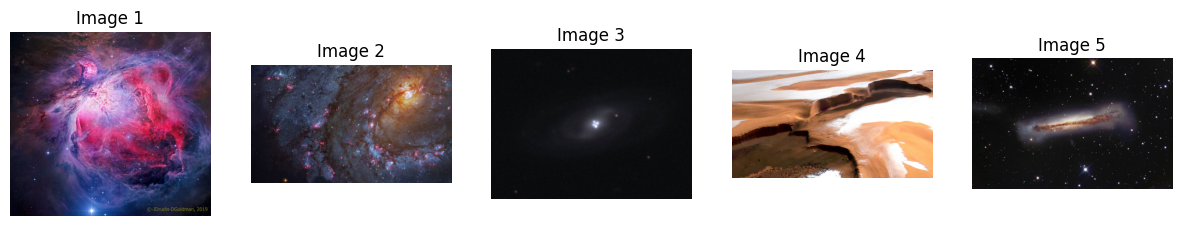

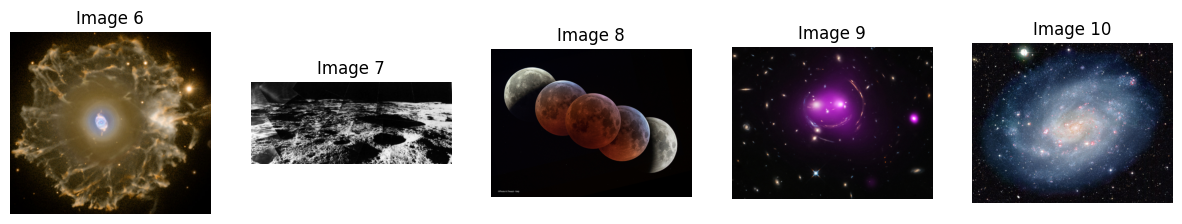

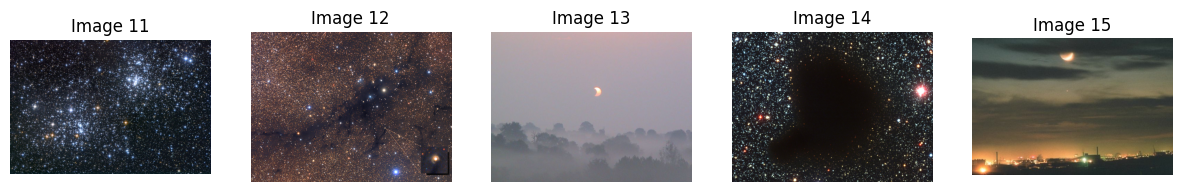

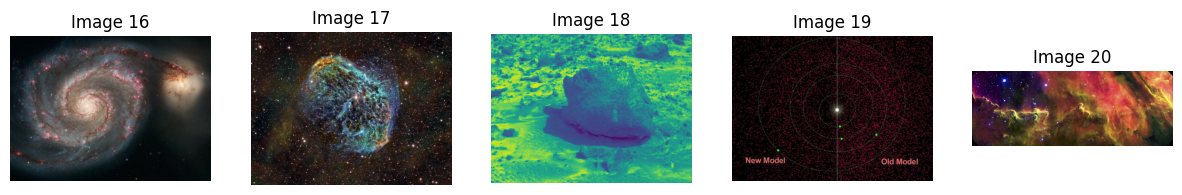

In [13]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# 이미지가 저장된 디렉토리 경로
image_dir = "apod_images"

# 저장된 이미지 파일 목록 가져오기
image_files = os.listdir(image_dir)

# 이미지 파일 수
num_images = len(image_files)

# 한 줄에 표시할 이미지 수
images_per_row = 5

# 이미지를 표시할 총 행 수 계산
num_rows = (num_images + images_per_row - 1) // images_per_row

# 이미지를 한 줄에 5장씩 시각화
for row in range(num_rows):
    # 한 줄에 표시할 이미지 시작과 끝 인덱스 계산
    start_index = row * images_per_row
    end_index = min((row + 1) * images_per_row, num_images)

    # 새로운 플롯 생성
    fig, axes = plt.subplots(1, end_index - start_index, figsize=(15, 3))

    # 해당 행의 이미지를 순회하면서 플롯에 추가
    for i, idx in enumerate(range(start_index, end_index)):
        # 이미지 파일 경로
        image_path = os.path.join(image_dir, image_files[idx])

        # 이미지 열기
        img = Image.open(image_path)

        # 이미지 표시
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Image {idx+1}")

    plt.show()



## **End**